# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


# Import API key
#from api_keys import api_key -- defined as variable within jupyter notebook instead

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Config info
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "4213768925a3615b596cedffc226e621"
city = cities[0]

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city + '&' + 'units=imperial'

# Get weather data and test response for single city
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
pprint(weather_json)
print('\n')

cloudiness = weather_json['clouds']['all']
country = weather_json['sys']['country']
date = weather_json['dt']
lat = weather_json['coord']['lat']
lng = weather_json['coord']['lon']
maxTemp = weather_json ['main']['temp_max']
windSpeed = weather_json['wind']['speed']
humidity = weather_json['main']['humidity']

print(cloudiness)
print(country)
print(date)
print(lat)
print(lng)
print(maxTemp)
print(windSpeed)
print(humidity)
# try
# except:
#     print('City not found. Skipping...')

{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': -46.19, 'lon': 168.86},
 'dt': 1568082183,
 'id': 6201424,
 'main': {'humidity': 64,
          'pressure': 1005,
          'temp': 50,
          'temp_max': 50,
          'temp_min': 50},
 'name': 'Mataura',
 'sys': {'country': 'NZ',
         'id': 2008959,
         'message': 0.0067,
         'sunrise': 1568055544,
         'sunset': 1568096700,
         'type': 3},
 'timezone': 43200,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 229, 'gust': 18.99, 'speed': 11.99}}


78
NZ
1568082183
-46.19
168.86
50
11.99
64


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dataframe to hold values
city_weather = pd.DataFrame(cities, columns=['City'])
city_weather[['Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]=pd.DataFrame([['','','','','','','','']], index=city_weather.index)

# Loop through city list to check for responses and assign values to dataframe
print('Beginning Data Retrieval')
print('---------------------------')
for index,row in city_weather.iterrows():
    city = row['City']
    try:
        # Build query URL
        query_url = url + "appid=" + api_key + "&q=" + city + '&' + 'units=imperial'
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # get weather characteristics
        cloudiness = weather_json['clouds']['all']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        maxTemp = weather_json ['main']['temp_max']
        windSpeed = weather_json['wind']['speed']
        humidity = weather_json['main']['humidity']
        
        # assign weather characteristics to data frame
        city_weather.loc[index,'Cloudiness'] = cloudiness
        city_weather.loc[index,'Country'] = country
        city_weather.loc[index,'Date'] = date
        city_weather.loc[index,'Humidity'] = humidity
        city_weather.loc[index,'Lat'] = lat
        city_weather.loc[index,'Lng'] = lng
        city_weather.loc[index,'Max Temp'] = maxTemp
        city_weather.loc[index,'Wind Speed'] = windSpeed

        print(f'Processing Record {index} of Set | {city}')
    except (KeyError, IndexError):
        print('City not found. Skipping...')

print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginning Data Retrieval
---------------------------
Processing Record 0 of Set | mataura
Processing Record 1 of Set | san cristobal
Processing Record 2 of Set | mariakani
Processing Record 3 of Set | talnakh
Processing Record 4 of Set | guangyuan
Processing Record 5 of Set | georgetown
Processing Record 6 of Set | saskylakh
Processing Record 7 of Set | cidreira
Processing Record 8 of Set | kodiak
Processing Record 9 of Set | bulaevo
Processing Record 10 of Set | kavieng
Processing Record 11 of Set | mount isa
Processing Record 12 of Set | cayenne
Processing Record 13 of Set | nouadhibou
Processing Record 14 of Set | manzanillo
Processing Record 15 of Set | aguimes
Processing Record 16 of Set | ribeira grande
Processing Record 17 of Set | bonavista
Processing Record 18 of Set | barcelos
Processing Record 19 of Set | iguape
Processing Record 20 of Set | cape town
Processing Record 21 of Set | chuy
Processing Record 22 of Set | albany
Processing Record 23 of Set | sakaiminato
Processing 

Processing Record 210 of Set | markova
Processing Record 211 of Set | hay river
Processing Record 212 of Set | buritizeiro
City not found. Skipping...
Processing Record 214 of Set | namibe
Processing Record 215 of Set | burns lake
Processing Record 216 of Set | weihe
Processing Record 217 of Set | phangnga
Processing Record 218 of Set | saint-denis
Processing Record 219 of Set | carauari
Processing Record 220 of Set | maningrida
Processing Record 221 of Set | merta
Processing Record 222 of Set | nalut
Processing Record 223 of Set | yar-sale
Processing Record 224 of Set | jishou
Processing Record 225 of Set | la macarena
Processing Record 226 of Set | bassar
Processing Record 227 of Set | hasaki
City not found. Skipping...
City not found. Skipping...
Processing Record 230 of Set | abonnema
Processing Record 231 of Set | rio gallegos
Processing Record 232 of Set | lompoc
Processing Record 233 of Set | guerrero negro
Processing Record 234 of Set | vaitape
Processing Record 235 of Set | ve

Processing Record 422 of Set | alyangula
Processing Record 423 of Set | del rio
City not found. Skipping...
City not found. Skipping...
Processing Record 426 of Set | kropotkin
Processing Record 427 of Set | cartagena
City not found. Skipping...
Processing Record 429 of Set | sorland
Processing Record 430 of Set | aketi
Processing Record 431 of Set | nazilli
City not found. Skipping...
Processing Record 433 of Set | lufkin
Processing Record 434 of Set | pailon
Processing Record 435 of Set | koygorodok
Processing Record 436 of Set | catarman
Processing Record 437 of Set | polovinnoye
Processing Record 438 of Set | thessalon
Processing Record 439 of Set | anqing
Processing Record 440 of Set | karkal
Processing Record 441 of Set | sebezh
Processing Record 442 of Set | cabras
Processing Record 443 of Set | waingapu
Processing Record 444 of Set | sangar
Processing Record 445 of Set | fukue
Processing Record 446 of Set | hami
Processing Record 447 of Set | pombas
Processing Record 448 of Set

In [7]:
city_weather.head()
#export to csv
city_weather.to_csv(output_data_file)
# replace empty values with NaN
city_weather['Cloudiness'].replace('', np.nan, inplace=True)
# Remove rows with no data
city_weather = city_weather.dropna()


In [8]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,78.0,NZ,1568082183,64,-46.19,168.86,50,11.99
1,san cristobal,90.0,HN,1568082183,93,14.68,-86.92,67.91,6.4
2,mariakani,56.0,KE,1568082183,84,-3.87,39.47,69.53,7.47
3,talnakh,40.0,RU,1568082183,93,69.49,88.39,35.6,8.95
4,guangyuan,99.0,CN,1568082183,85,32.43,105.86,73.99,3.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

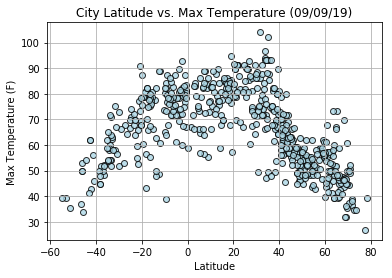

In [13]:
# Get Current Date Stamp
from datetime import datetime
currentDate = datetime.now().date().strftime('%m/%d/%y')
plt.scatter(city_weather.Lat,city_weather['Max Temp'],edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({currentDate})')

# Save and show plot
plt.savefig('City Latitude vs. Max Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

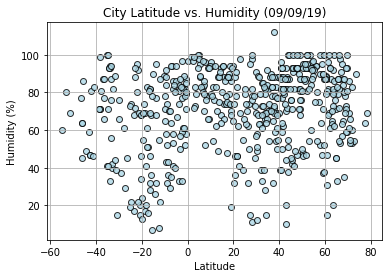

In [14]:
plt.scatter(city_weather.Lat,city_weather.Humidity,edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({currentDate})')
# Save and show plot
plt.savefig('City Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

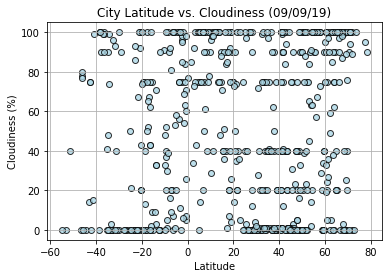

In [15]:
plt.scatter(city_weather.Lat,city_weather.Cloudiness,edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({currentDate})')
# Save and show plot
plt.savefig('City Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

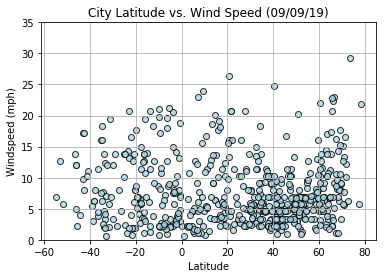

In [16]:
plt.scatter(city_weather.Lat,city_weather['Wind Speed'],edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.ylim(0,35)
plt.title(f'City Latitude vs. Wind Speed ({currentDate})')
# Save and show plot
plt.savefig('City Latitude vs. Wind Speed.png')
plt.show()